# Stratification
This notebook deals with different implementaion of stratification.

## 1. Implementation of Stratification based on Medium Blogpost by Anil Ozturk
* https://medium.com/@nlztrk/stratification-on-regression-problems-e36b3b866079

In [2]:
#packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import pandas as pd

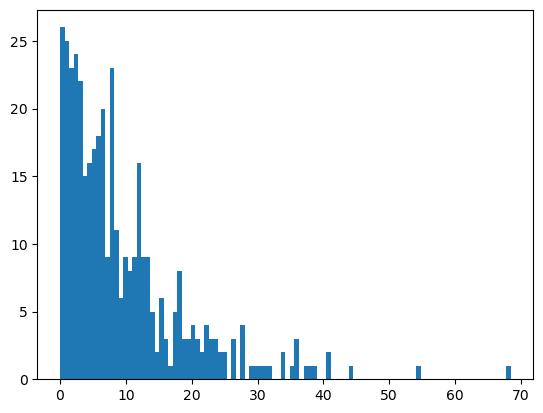

In [3]:
# generate random target values of regression problem: floats between 0 and 100
np.random.seed(seed=3)
y = np.random.exponential(scale=10, size=400)

# Convert NumPy array to Pandas DataFrame as in later application, y is most likely a data frame
#y = pd.DataFrame({'Target': y})

# plot histogram of target values
plt.hist(y, bins=100)
plt.show()

In [4]:
''' original funciton
def create_cont_folds(df, n_s=8, n_grp=1000, seed=1):
    # StratifiedKFold for classification
    skf = StratifiedKFold(n_splits=n_s, shuffle=True, random_state=seed)
    #pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise'
    # q = Number of quantiles
    grp = pd.qcut(x = df, q = n_grp, labels=False)
    target = grp
    
    fold_nums = np.zeros(len(df))
    for fold_no, (t, v) in enumerate(skf.split(target, target)):
        fold_nums[v] = fold_no
    
    cv_splits = []

    for i in range(num_of_folds):
        test_indices = np.argwhere(fold_nums==i).flatten()
        train_indices = list(set(range(len(labels))) - set(test_indices))
        cv_splits.append((train_indices, test_indices))
        
    return cv_splits
'''

" original funciton\ndef create_cont_folds(df, n_s=8, n_grp=1000, seed=1):\n    # StratifiedKFold for classification\n    skf = StratifiedKFold(n_splits=n_s, shuffle=True, random_state=seed)\n    #pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise'\n    # q = Number of quantiles\n    grp = pd.qcut(x = df, q = n_grp, labels=False)\n    target = grp\n    \n    fold_nums = np.zeros(len(df))\n    for fold_no, (t, v) in enumerate(skf.split(target, target)):\n        fold_nums[v] = fold_no\n    \n    cv_splits = []\n\n    for i in range(num_of_folds):\n        test_indices = np.argwhere(fold_nums==i).flatten()\n        train_indices = list(set(range(len(labels))) - set(test_indices))\n        cv_splits.append((train_indices, test_indices))\n        \n    return cv_splits\n"

In [5]:
'''
labels= y# labels
n_s=4 # number of folds
n_grp=10 # number of groups
num_of_folds = 10
num_of_groups = 10
seed=1 # set seed


# StratifiedKFold for classification
skf = StratifiedKFold(n_splits=n_s, shuffle=True, random_state=seed)
# create groups
grp = pd.qcut(labels, n_grp, labels=False)
target = grp

# create fold numbers    
fold_nums = np.zeros(len(labels))
#split(X, y[, groups]): Generate indices to split data into training and test set.
for fold_no, (t, v) in enumerate(skf.split(target, target)): 
    fold_nums[v] = fold_no
    print(fold_no)
#print("fold_nums", fold_nums)
    
cv_splits = []

# iterate over folds
for i in range(num_of_folds):
    test_indices = np.argwhere(fold_nums==i).flatten()
    train_indices = list(set(range(len(labels))) - set(test_indices))
    cv_splits.append((train_indices, test_indices))
        
#cv_splits
'''

'\nlabels= y# labels\nn_s=4 # number of folds\nn_grp=10 # number of groups\nnum_of_folds = 10\nnum_of_groups = 10\nseed=1 # set seed\n\n\n# StratifiedKFold for classification\nskf = StratifiedKFold(n_splits=n_s, shuffle=True, random_state=seed)\n# create groups\ngrp = pd.qcut(labels, n_grp, labels=False)\ntarget = grp\n\n# create fold numbers    \nfold_nums = np.zeros(len(labels))\n#split(X, y[, groups]): Generate indices to split data into training and test set.\nfor fold_no, (t, v) in enumerate(skf.split(target, target)): \n    fold_nums[v] = fold_no\n    print(fold_no)\n#print("fold_nums", fold_nums)\n    \ncv_splits = []\n\n# iterate over folds\nfor i in range(num_of_folds):\n    test_indices = np.argwhere(fold_nums==i).flatten()\n    train_indices = list(set(range(len(labels))) - set(test_indices))\n    cv_splits.append((train_indices, test_indices))\n        \n#cv_splits\n'

In [6]:
n_folds=4 # number of folds in cross-validation
n_goups=10 # number of groups for quantile-based discretization 
seed=1 # set seed

# create StratifiedKFold like for classification
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

# create groups in y with pd.qcut: quantile-based discretization 
y_grouped = pd.qcut(y, n_goups, labels=False)

# create fold numbers    
fold_nums = np.zeros(len(y))
#split(X, y[, groups]): Generate indices to split data into training and test set
for fold_no, (t, v) in enumerate(skf.split(y_grouped, y_grouped)): #@Nadja: unabhängig von n_folds? n_folds = fol_no, test_data_size = N/n_folds
    fold_nums[v] = fold_no
    #print(fold_no)

cv_splits = []

# iterate over folds
for i in range(n_folds):
    test_indices = np.argwhere(fold_nums==i).flatten()
    train_indices = list(set(range(len(y_grouped))) - set(test_indices))
    cv_splits.append((train_indices, test_indices))

Some checks:

In [7]:
# Iterate over the splits and print the sizes of the training and testing sets
for train_index, test_index in skf.split(y_grouped, y_grouped):
    print(f"Train set: {len(train_index)} samples, Test set: {len(test_index)} samples")

#train_index

Train set: 300 samples, Test set: 100 samples
Train set: 300 samples, Test set: 100 samples
Train set: 300 samples, Test set: 100 samples
Train set: 300 samples, Test set: 100 samples


400
[0 1 2 3 4 5 6 7 8 9]
0: 40
1: 40
2: 40
3: 40
4: 40
5: 40
6: 40
7: 40
8: 40
9: 40


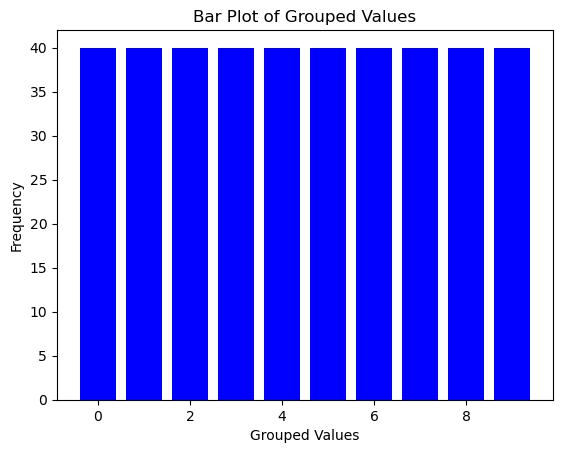

In [8]:
print(len(y_grouped))
print(np.sort(np.unique(y_grouped)))

# Assuming grp is a NumPy array
unique_values, counts = np.unique(y_grouped, return_counts=True)

# Print the counts of unique values
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")


# Create a bar plot
plt.bar(unique_values, counts, color='blue')

# Add labels and title
plt.xlabel('Grouped Values')
plt.ylabel('Frequency')
plt.title('Bar Plot of Grouped Values')

# Show the plot
plt.show()



400
[0. 1. 2. 3.]
0.0: 100
1.0: 100
2.0: 100
3.0: 100


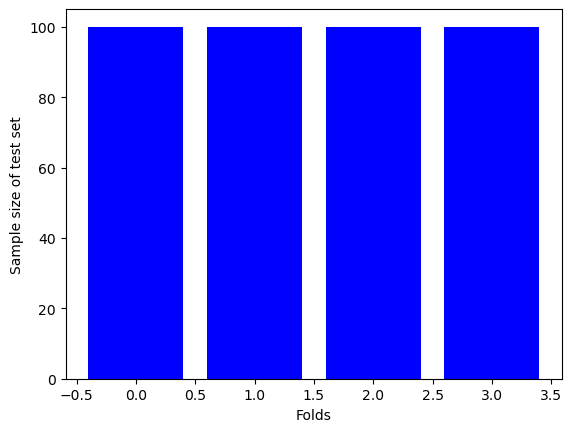

In [9]:
print(len(fold_nums))
print(np.sort(np.unique(fold_nums)))

# Assuming grp is a NumPy array
unique_values, counts = np.unique(fold_nums, return_counts=True)

# Print the counts of unique values
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

# Create a bar plot
plt.bar(unique_values, counts, color='blue')

# Add labels and title
plt.xlabel('Folds')
plt.ylabel('Sample size of test set')

# Show the plot
plt.show()


400
400


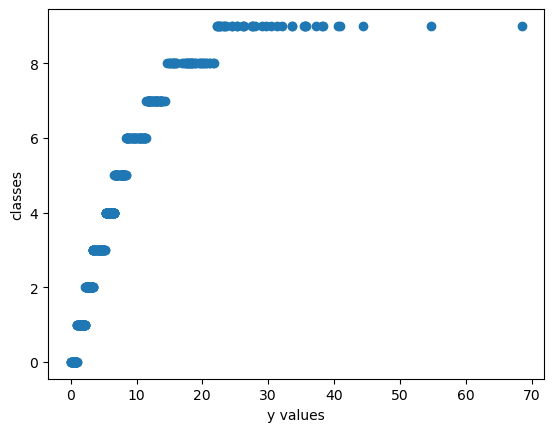

In [10]:
print(len(y))
print(len(y_grouped))

# plot y and grop
plt.plot(y, y_grouped, 'o')
plt.xlabel('y values')
plt.ylabel('classes')
plt.show()

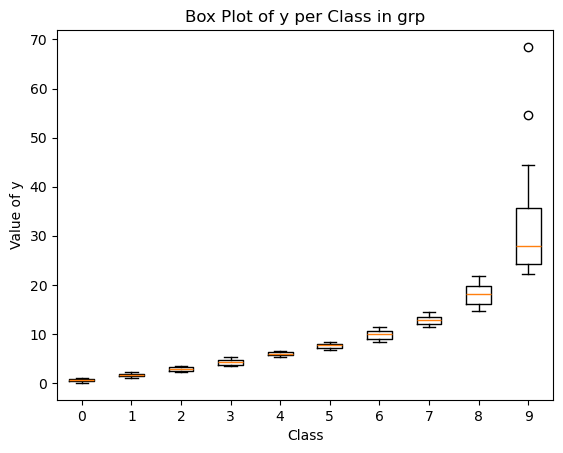

In [11]:
# Create a list to store the values of 'y' for each class in 'grp'
data_by_class = [y[y_grouped == i] for i in np.unique(y_grouped)]

# Create a box plot
plt.boxplot(data_by_class, labels=np.unique(y_grouped))

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Value of y')
plt.title('Box Plot of y per Class in grp')

# Show the plot
plt.show()

In [12]:
print(len(cv_splits))
print(len(cv_splits[0]))
print(cv_splits[0][0][:10])
print(cv_splits[1][0][:10])

4
2
[1, 2, 3, 4, 6, 7, 8, 9, 10, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10]


In [13]:
def create_cont_folds(y, n_folds=5, n_groups=5, seed=1):
    # create StratifiedKFold like for classification
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

    # create groups in y with pd.qcut: quantile-based discretization 
    y_grouped = pd.qcut(y, n_groups, labels=False)

    # create fold numbers    
    fold_nums = np.zeros(len(y))
    #split(X, y[, groups]): Generate indices to split data into training and test set
    for fold_no, (t, v) in enumerate(skf.split(y_grouped, y_grouped)): #@Nadja: unabhängig von n_folds? n_folds = fol_no, test_data_size = N/n_folds
        fold_nums[v] = fold_no
  

    cv_splits = []

    # iterate over folds and creat train and test indices for each fold
    for i in range(n_folds):
        test_indices = np.argwhere(fold_nums==i).flatten()
        train_indices = list(set(range(len(y_grouped))) - set(test_indices))
        cv_splits.append((train_indices, test_indices))

    return cv_splits

In [14]:
cv_splits_test = create_cont_folds(y, n_folds=4, n_groups=5, seed=1)
print(len(cv_splits_test))

4


In [15]:
# check that cv splits worked correctly
test_dat=[]
for index, value in enumerate(cv_splits_test):
    test_dat.extend(value[1])
num_unique_numbers = len(set(test_dat))
print(f"Number of unique numbers: {num_unique_numbers}")

Number of unique numbers: 400


## Visualization

In [16]:
from utils_Nadja import fold_visualizer

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

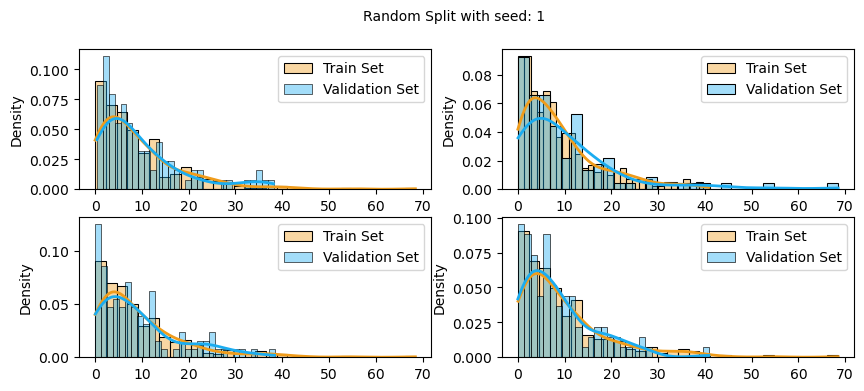

In [17]:
fold_visualizer(data=y,fold_idxs=cv_splits_test,seed_num=1)

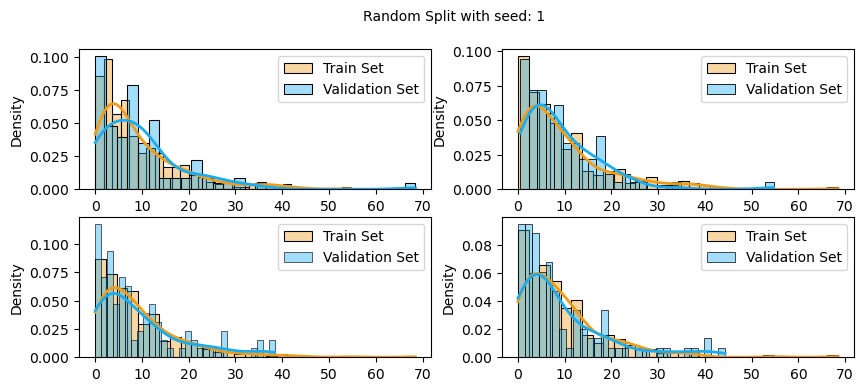

In [18]:
from sklearn.model_selection import KFold
baseline_kfold = list(KFold(4,shuffle=True,random_state=3).split(y))
fold_visualizer(data=y,fold_idxs=baseline_kfold,seed_num=1)

## Only train-test split

In [19]:
def train_test_split_strtified(y, n_goups_binning=5, seed=1, percentage_test=0.2):
    n_splits = int(1/percentage_test) #@Nadja: sollte man denk ich entkoppeln
    print(n_splits)
    # create StratifiedKFold like for classification
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

    # create groups in y with pd.qcut: quantile-based discretization 
    y_grouped = pd.qcut(y, n_goups_binning, labels=False)

    # create fold numbers    
    fold_nums = np.zeros(len(y))
    #split(X, y[, groups]): Generate indices to split data into training and test set
    for fold_no, (t, v) in enumerate(skf.split(y_grouped, y_grouped)): #@Nadja: unabhängig von n_folds? n_folds = fol_no, test_data_size = N/n_folds
        fold_nums[v] = fold_no

    test_indices = np.argwhere(fold_nums==1).flatten()
    train_indices = list(set(range(len(y_grouped))) - set(test_indices))
    y_test = y[test_indices]
    y_train = y[train_indices]

    return y_test, y_train

#@Nadja: achtung mit der ausgabe, du gibst nur y aus... entweder auch x dazu ausgeben oder die indizes, dass du die richtigen X nehmen kannst.

In [20]:
y_test, y_train = train_test_split_strtified(y, n_goups_binning=5, seed=1, percentage_test=0.2)
print(len(y_test))
print(len(y_train))


5
80
320


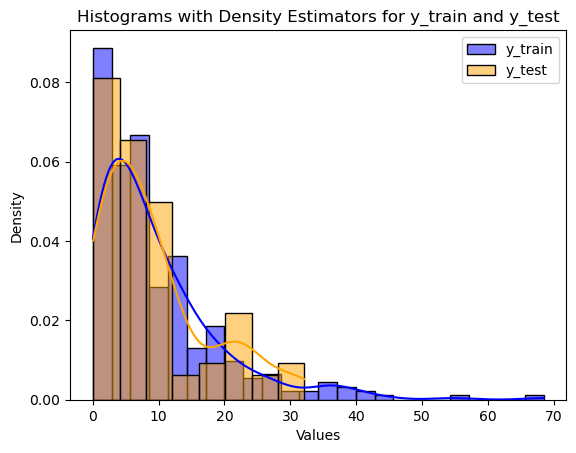

In [21]:
import seaborn as sns
# Create histograms with density estimators
sns.histplot(y_train, kde=True, label='y_train', color='blue', stat="density")
sns.histplot(y_test, kde=True, label='y_test', color='orange',stat="density")

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histograms with Density Estimators for y_train and y_test')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Different kinds of Binning

In [22]:
print(y.shape)

# sort y
y_sorted = y[np.argsort(y)]

(400,)


Constant binning width
Problem: can't sample from bins with only a few observations

Bin 1: 0.00745800081653839 - 6.854729142010632, Count: 206
Bin 2: 6.854729142010632 - 13.702000283204725, Count: 109
Bin 3: 13.702000283204725 - 20.54927142439882, Count: 40
Bin 4: 20.54927142439882 - 27.396542565592913, Count: 22
Bin 5: 27.396542565592913 - 34.24381370678701, Count: 11
Bin 6: 34.24381370678701 - 41.09108484798111, Count: 9
Bin 7: 41.09108484798111 - 47.9383559891752, Count: 1
Bin 8: 47.9383559891752 - 54.78562713036929, Count: 1
Bin 9: 54.78562713036929 - 61.632898271563384, Count: 0
Bin 10: 61.632898271563384 - 68.48016941275748, Count: 1


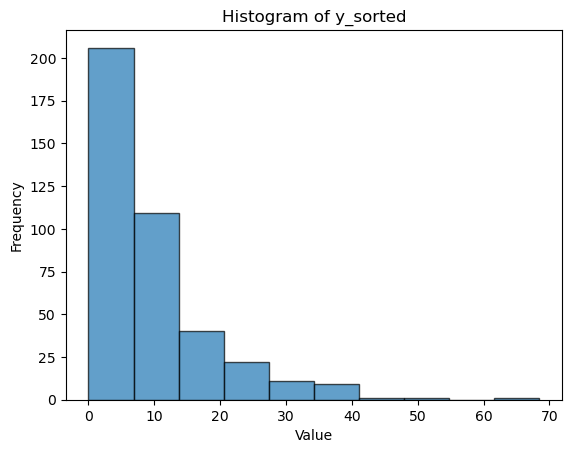

-6.85
-6.85
-6.85
-6.85
-6.85
-6.85
-6.85
-6.85
-6.85
-6.85


In [23]:
# Define the number of bins
num_bins = 10

# Compute the histogram: equal bin width
hist, bin_edges = np.histogram(y_sorted, bins=num_bins)

# Print the bin edges and corresponding counts
for i in range(num_bins):
    print(f'Bin {i + 1}: {bin_edges[i]} - {bin_edges[i + 1]}, Count: {hist[i]}')

    # Visualize the histogram
plt.hist(y_sorted, bins=num_bins, edgecolor='black', alpha=0.7)
plt.title('Histogram of y_sorted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


for i in range(num_bins):
    print(np.round(bin_edges[i] - bin_edges[i + 1], 2))

Binning based on number of data points -> quantiles:

Quantile 1: 0.00745800081653839 - 0.9404839083617231, Count: 40
Quantile 2: 0.9404839083617231 - 2.242676220177823, Count: 40
Quantile 3: 2.242676220177823 - 3.417245432560467, Count: 40
Quantile 4: 3.417245432560467 - 5.3027794816983835, Count: 40
Quantile 5: 5.3027794816983835 - 6.6230848115596075, Count: 40
Quantile 6: 6.6230848115596075 - 8.412437458408073, Count: 40
Quantile 7: 8.412437458408073 - 11.39860187275947, Count: 40
Quantile 8: 11.39860187275947 - 14.424123307089454, Count: 40
Quantile 9: 14.424123307089454 - 21.80292241653348, Count: 40
Quantile 10: 21.80292241653348 - 68.48016941275748, Count: 39


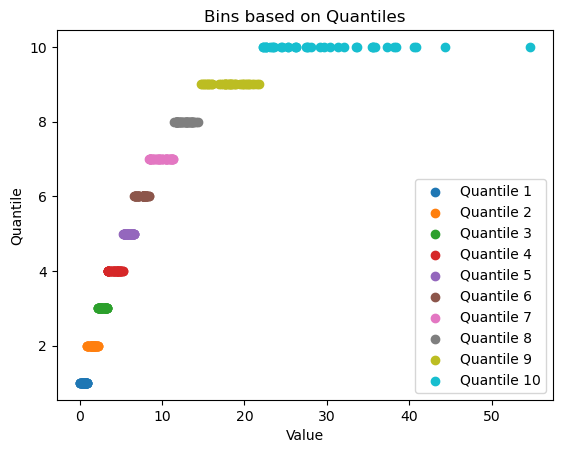

In [24]:
# Define the number of quantiles (e.g., quartiles)
num_quantiles = 10

# Calculate quantiles
quantiles = np.percentile(y_sorted, np.linspace(0, 100, num=num_quantiles+1))

# Create bins based on quantiles
bins = [f'Q{i+1}' for i in range(num_quantiles)]
labels = np.digitize(y_sorted, quantiles, right=False)

# Print the bins and corresponding counts
for i in range(1, num_quantiles + 1):
    bin_values = y_sorted[labels == i]
    print(f'Quantile {i}: {quantiles[i-1]} - {quantiles[i]}, Count: {len(bin_values)}')

# Visualize the bins
for i in range(1, num_quantiles + 1):
    bin_values = y_sorted[labels == i]
    plt.scatter(bin_values, [i] * len(bin_values), label=f'Quantile {i}')

plt.title('Bins based on Quantiles')
plt.xlabel('Value')
plt.ylabel('Quantile')
plt.legend()
plt.show()

# create index fore each fold


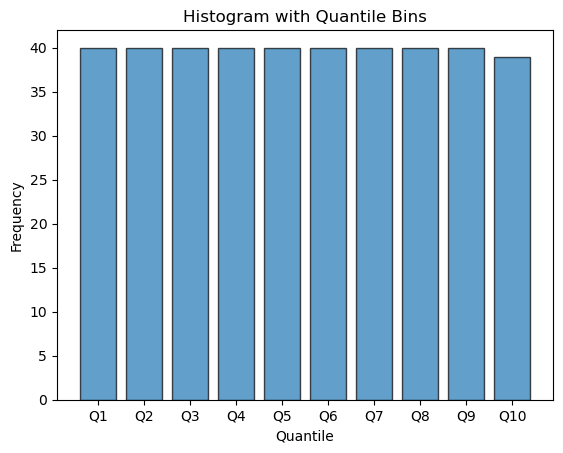

In [25]:
# Visualize the bins as a histogram
plt.hist(labels, bins=np.arange(1, num_quantiles+2)-0.5, edgecolor='black', alpha=0.7, rwidth=0.8)
plt.xticks(range(1, num_quantiles+1), bins)
plt.title('Histogram with Quantile Bins')
plt.xlabel('Quantile')
plt.ylabel('Frequency')
plt.show()

In [26]:
quantiles = pd.qcut(y, q=num_quantiles, labels=False)
print(len(quantiles))
print(len(y))



400
400


In [27]:
# get all y values for each quantile
quantile_values = []
for i in range(num_quantiles):
    quantile_values.append(y[quantiles == i])  
    print(len(quantile_values[i]))

40
40
40
40
40
40
40
40
40
40


In [28]:
def create_cont_folds(y,
                      n_folds=5, 
                      n_groups=5, 
                      seed=1):
    '''
    Function to create continuous folds.
    Inputs:
        y: the target variable
        n_folds: the number of folds
        n_groups: the number of groups (based on quantiles)
        seed: the seed to be used
    Outputs:
        cv_splits: the indices for the folds
    '''
    # create StratifiedKFold like for classification
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

    # create groups in y with pd.qcut: quantile-based discretization 
    y_grouped = pd.qcut(y, n_groups, labels=False)

    # create fold numbers    
    fold_nums = np.zeros(len(y))
    #split(X, y[, groups]): Generate indices to split data into training and test set
    for fold_no, (t, v) in enumerate(skf.split(y_grouped, y_grouped)): #@Nadja: unabhängig von n_folds? n_folds = fol_no, test_data_size = N/n_folds
        fold_nums[v] = fold_no

    cv_splits = []

    # iterate over folds and creat train and test indices for each fold
    for i in range(n_folds):
        test_indices = np.argwhere(fold_nums==i).flatten()
        train_indices = list(set(range(len(y_grouped))) - set(test_indices))
        cv_splits.append((train_indices, test_indices))

    return cv_splits


In [29]:
folds_stratified  = create_cont_folds(y,n_folds=10, n_groups=10, seed=1)
folds_stratified  = create_cont_folds(y,n_folds=10, n_groups=10, seed=1)

print(len(folds_stratified))
print(len(folds_stratified[0][1]))

10
40


In [30]:
# check if there are any duplicaates
# array_all_inex = []
for i in range(10):
    array_all_inex = np.concatenate((array_all_inex, folds_stratified[i][1]))

# Check for duplicates
has_duplicates = array_all_inex.size != np.unique(array_all_inex).size

if has_duplicates:
    print("The array has duplicates.")
else:
    print("The array does not have duplicates.")


NameError: name 'array_all_inex' is not defined

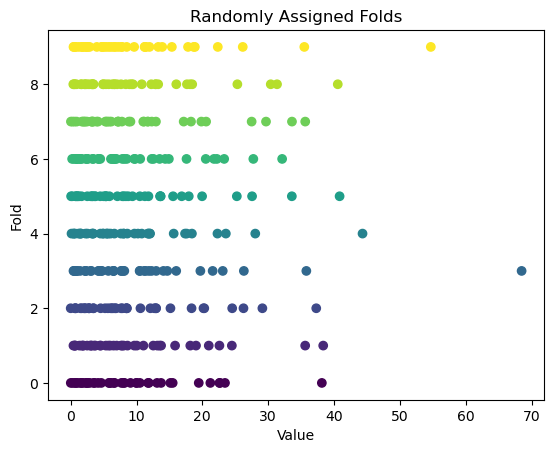

In [ ]:
# assign each y to on test fold visually
y_folds = y.copy()

for i in range(10):
    y_folds[folds_stratified[i][1]]  = i
    
# plot 
plt.scatter(y, y_folds, c=y_folds)
plt.title('Randomly Assigned Folds')
plt.xlabel('Value')
plt.ylabel('Fold')
plt.show()

Pick based on order

In [ ]:
for i in range(len(y_sorted)):
    y_sorted[i:i+10]

Doesn't work out as it depends on sampling:

In [ ]:
i = 0
folds = 10

# randomly assign each value to a fold
fold_nums = np.random.randint(0, folds, size=len(y_sorted))
# check that each fold has roughly the same number of values
for i in range(folds):
    print(f'Fold {i}: {np.sum(fold_nums == i)}')


Fold 0: 37
Fold 1: 49
Fold 2: 39
Fold 3: 39
Fold 4: 36
Fold 5: 35
Fold 6: 55
Fold 7: 39
Fold 8: 29
Fold 9: 42


Improved approach above:

In [ ]:
# create number 0 to 9 in random order
fold_nums = np.random.permutation(folds)
# create number 0 to 9 in random order and append 10 times
fold_nums = []
for i in range(len(y_sorted) // folds ): 
    fold_nums = np.append(fold_nums, np.random.permutation(folds))

# count occurence of each number
unique, counts = np.unique(fold_nums, return_counts=True)
dict(zip(unique, counts))


{0.0: 40,
 1.0: 40,
 2.0: 40,
 3.0: 40,
 4.0: 40,
 5.0: 40,
 6.0: 40,
 7.0: 40,
 8.0: 40,
 9.0: 40}

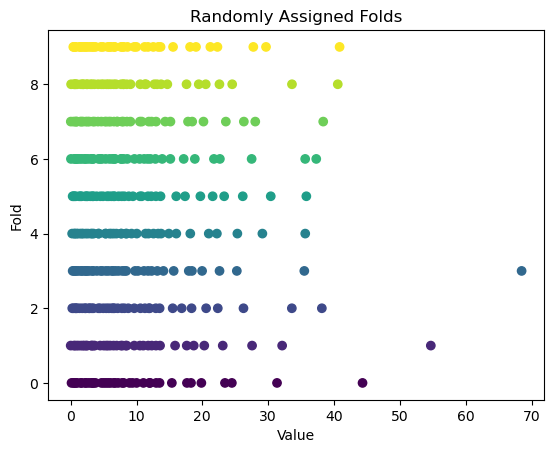

In [ ]:
# plot x = y_sorted and y = fold_nums, coloured by fold_nums
plt.scatter(y_sorted, fold_nums, c=fold_nums)
plt.title('Randomly Assigned Folds')
plt.xlabel('Value')
plt.ylabel('Fold')
plt.show()

## Implementation StratifiedKFold

[ 7  8  2  1  6  2  6 10  8  4  3  6  1  1  5  2  7  5 10  5  9  8  2  3
  5  7  5  6  7  6  4  4  9  7  4  3  7  9  1 10  4  2  6  1  4  1  6  2
  6  1  9 10  4  9  2  3 10  8  7 10 10  6  7  2  8  8 10  5  9  9  8  2
  2  3  4  8  4  9 10  3  8  1  9  5  6  3  9  5  3  7  8  4  3  1  3  5
  5  1 10  7]


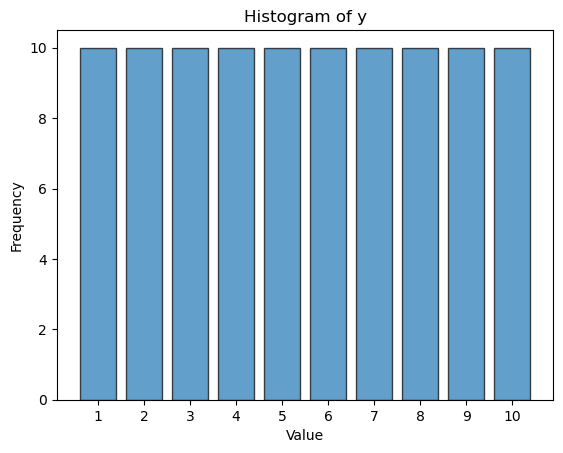

In [ ]:
# Create y : intigers from 1-10, each 10 times
y = np.repeat(np.arange(1, 11), 10)
# shuflle y
y = np.random.permutation(y)
print(y)
# set number of splits 
n_splits =5
# set shuffle = False
shuffle = False 

#historgram of y
plt.hist(y, bins=np.arange(1, 12)-0.5, edgecolor='black', alpha=0.7, rwidth=0.8)
plt.xticks(range(1, 11))
plt.title('Histogram of y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
class StratifiedKFold(_BaseKFold):
    """Stratified K-Folds cross-validator.

    Provides train/test indices to split data in train/test sets.

    This cross-validation object is a variation of KFold that returns
    stratified folds. The folds are made by preserving the percentage of
    samples for each class.

    Read more in the :ref:`User Guide <stratified_k_fold>`.

    For visualisation of cross-validation behaviour and
    comparison between common scikit-learn split methods
    refer to :ref:`sphx_glr_auto_examples_model_selection_plot_cv_indices.py`

    Parameters
    ----------
    n_splits : int, default=5
        Number of folds. Must be at least 2.

        .. versionchanged:: 0.22
            ``n_splits`` default value changed from 3 to 5.

    shuffle : bool, default=False
        Whether to shuffle each class's samples before splitting into batches.
        Note that the samples within each split will not be shuffled.

    random_state : int, RandomState instance or None, default=None
        When `shuffle` is True, `random_state` affects the ordering of the
        indices, which controls the randomness of each fold for each class.
        Otherwise, leave `random_state` as `None`.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.

    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.model_selection import StratifiedKFold
    >>> X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
    >>> y = np.array([0, 0, 1, 1])
    >>> skf = StratifiedKFold(n_splits=2)
    >>> skf.get_n_splits(X, y)
    2
    >>> print(skf)
    StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
    >>> for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    ...     print(f"Fold {i}:")
    ...     print(f"  Train: index={train_index}")
    ...     print(f"  Test:  index={test_index}")
    Fold 0:
      Train: index=[1 3]
      Test:  index=[0 2]
    Fold 1:
      Train: index=[0 2]
      Test:  index=[1 3]

    Notes
    -----
    The implementation is designed to:

    * Generate test sets such that all contain the same distribution of
      classes, or as close as possible.
    * Be invariant to class label: relabelling ``y = ["Happy", "Sad"]`` to
      ``y = [1, 0]`` should not change the indices generated.
    * Preserve order dependencies in the dataset ordering, when
      ``shuffle=False``: all samples from class k in some test set were
      contiguous in y, or separated in y by samples from classes other than k.
    * Generate test sets where the smallest and largest differ by at most one
      sample.

    .. versionchanged:: 0.22
        The previous implementation did not follow the last constraint.

    See Also
    --------
    RepeatedStratifiedKFold : Repeats Stratified K-Fold n times.
  

    def __init__(self, n_splits=5, *, shuffle=False, random_state=None):
        super().__init__(n_splits=n_splits, shuffle=shuffle, random_state=random_state)

    def _make_test_folds(self, X, y=None):
        rng = check_random_state(self.random_state)
        y = np.asarray(y)
        type_of_target_y = type_of_target(y)
        allowed_target_types = ("binary", "multiclass")
        if type_of_target_y not in allowed_target_types:
            raise ValueError(
                "Supported target types are: {}. Got {!r} instead.".format(
                    allowed_target_types, type_of_target_y
                )
            )
  """

NameError: name '_BaseKFold' is not defined

Create y_encoded. Interpretation: 0 in y_encoded is the first label in y, 1 in y_encoded is the second label in y, ...

In [ ]:
# y_inv encodes y according to lexicographic order. We invert y_idx to
# map the classes so that they are encoded by order of appearance:
# 0 represents the first label appearing in y, 1 the second, etc.
_, y_idx, y_inv = np.unique(y, return_index=True, return_inverse=True)
_, class_perm = np.unique(y_idx, return_inverse=True)
y_encoded = class_perm[y_inv]

In [ ]:
n_classes = len(y_idx) # number classes
y_counts = np.bincount(y_encoded) # how often which class occurs
min_groups = np.min(y_counts) # smallest number of occurences of a class
''' 
        if np.all(self.n_splits > y_counts):
            raise ValueError(
                "n_splits=%d cannot be greater than the"
                " number of members in each class." % (self.n_splits)
            )
        if self.n_splits > min_groups:          !!!!!!!!!
            warnings.warn(
                "The least populated class in y has only %d"
                " members, which is less than n_splits=%d."
                % (min_groups, self.n_splits),
                UserWarning,
            )
'''


' \n        if np.all(self.n_splits > y_counts):\n            raise ValueError(\n                "n_splits=%d cannot be greater than the"\n                " number of members in each class." % (self.n_splits)\n            )\n        if self.n_splits > min_groups:          !!!!!!!!!\n            warnings.warn(\n                "The least populated class in y has only %d"\n                " members, which is less than n_splits=%d."\n                % (min_groups, self.n_splits),\n                UserWarning,\n            )\n'

In [ ]:
# Determine the optimal number of samples from each class in each fold,
# using round robin over the sorted y. (This can be done direct from
# counts, but that code is unreadable.)
# interpretation: how many samples of each class should be in each (test) fold
y_order = np.sort(y_encoded)
allocation = np.asarray(
[
np.bincount(y_order[i :: n_splits], minlength=n_classes)
for i in range(n_splits)
])
allocation


array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [ ]:
# To maintain the data order dependencies as best as possible within
# the stratification constraint, we assign samples from each class in
# blocks (and then mess that up when shuffle=True).
test_folds = np.empty(len(y), dtype="i")
for k in range(n_classes):
    # since the kth column of allocation stores the number of samples
    # of class k in each test set, this generates blocks of fold
    # indices corresponding to the allocation for class k.
    folds_for_class = np.arange(n_splits).repeat(allocation[:, k])
    if shuffle:
        rng.shuffle(folds_for_class)
        test_folds[y_encoded == k] = folds_for_class
print(len(test_folds))
test_folds

100


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
 '''
 def _iter_test_masks(self, X, y=None, groups=None):
        test_folds = self._make_test_folds(X, y)
        for i in range(self.n_splits):
            yield test_folds == i
'''

   # def split(self, X, y, groups=None):
"""Generate indices to split data into training and test set.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where `n_samples` is the number of samples
            and `n_features` is the number of features.

            Note that providing ``y`` is sufficient to generate the splits and
            hence ``np.zeros(n_samples)`` may be used as a placeholder for
            ``X`` instead of actual training data.

        y : array-like of shape (n_samples,)
            The target variable for supervised learning problems.
            Stratification is done based on the y labels.

        groups : object
            Always ignored, exists for compatibility.

        Yields
        ------
        train : ndarray
            The training set indices for that split.

        test : ndarray
            The testing set indices for that split.

        Notes
        -----
        Randomized CV splitters may return different results for each call of
        split. You can make the results identical by setting `random_state`
        to an integer.
"""
#y = check_array(y, input_name="y", ensure_2d=False, dtype=None)
# import KFold
from sklearn.model_selection import KFold
KFold.split(y, y, groups=None)

<generator object _BaseKFold.split at 0x12ebeeb00>

## Verstack

In [ ]:
from verstack.stratified_continuous_split import scsplit

# generate random target values of regression problem: floats between 0 and 100
np.random.seed(seed=3)
y = np.random.exponential(scale=10, size=400)
X = np.random.exponential(scale=4, size=400)

train, valid = scsplit(X,y, stratify = y)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

# Stratification visualizaiton Housing data

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import random
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
descr = housing_data['DESCR']
feature_names = housing_data['feature_names']
data = housing_data['data']
target = housing_data['target']
df1 = pd.DataFrame(data=data)
df1.rename(columns={0: feature_names[0], 1: feature_names[1], 2: feature_names[2], 3: feature_names[3],
 4: feature_names[4], 5: feature_names[5], 6: feature_names[6], 7: feature_names[7]}, inplace=True)
df2 = pd.DataFrame(data=target)
df2.rename(columns={0: 'Target'}, inplace=True)
housing = pd.concat([df1, df2], axis=1)
print(housing.columns)


print('dimension of housing data: {}'.format(housing.shape))
print(housing.info())
housing.head()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')
dimension of housing data: (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


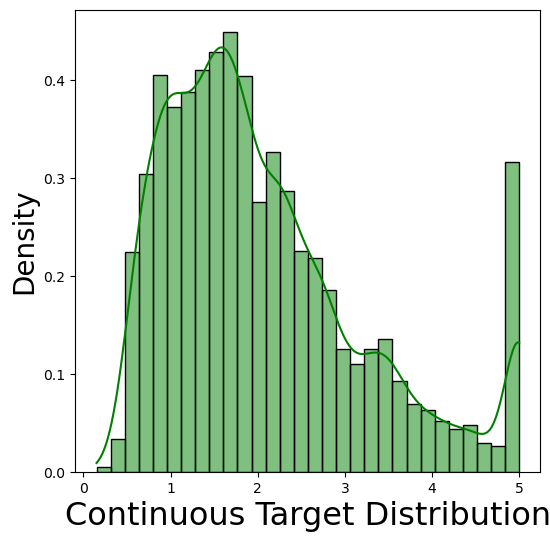

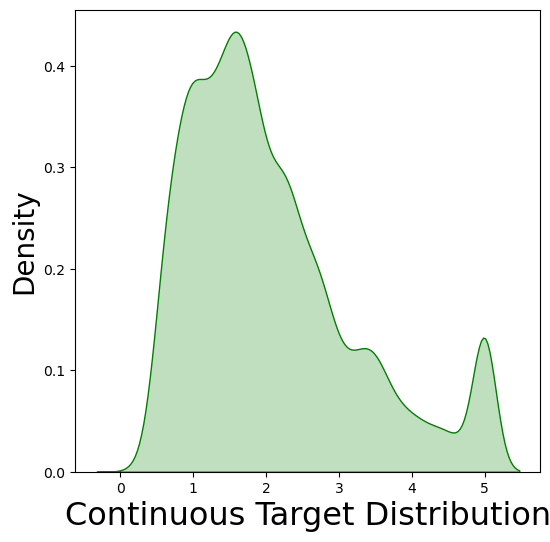

In [3]:
# histogram with kde
plt.figure(figsize=(6,6))
_ = sns.histplot(data=target, kde=True, stat="density", bins=30, color = 'green')
plt.xlabel("Continuous Target Distribution", fontsize=23)
plt.ylabel("Density", fontsize=20)
plt.savefig("./plots/histplot.png")

# just kde
plt.figure(figsize=(6,6))
_ = sns.kdeplot(data=target, shade=True, color = 'green')
plt.xlabel("Continuous Target Distribution", fontsize=23)
plt.ylabel("Density", fontsize=20)
plt.savefig("./plots/kdeplot.png")



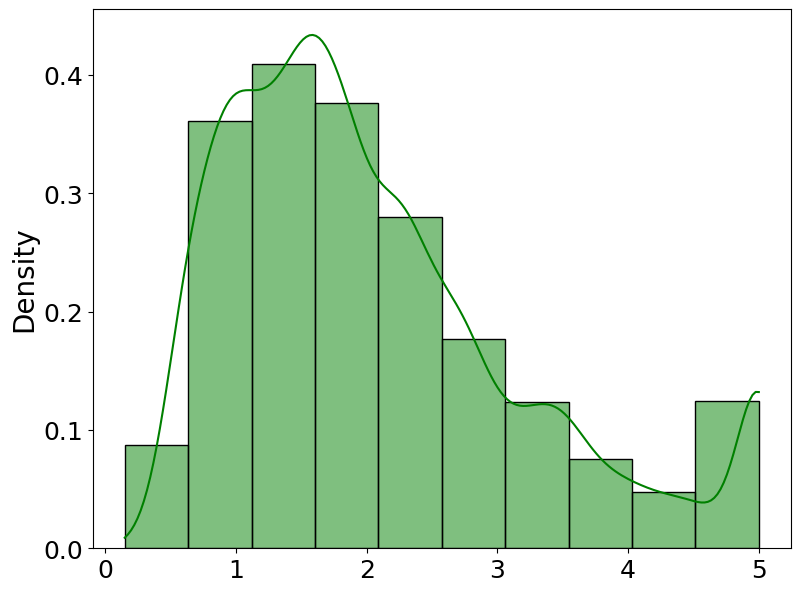

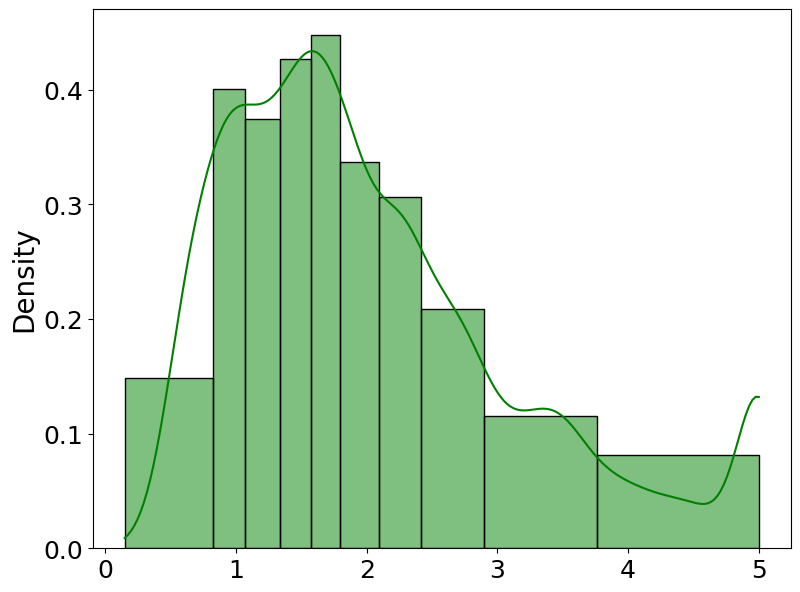

In [14]:
# create groups in y with pd.qcut: quantile-based discretization 
y_grouped = pd.qcut(target, q=10, labels=False)
y_grouped

# check y_grouped
np.unique(y_grouped, return_counts=True)

# get highest value of each group
y_grouped_max = []
# add minimum to y_grouped_max
y_grouped_max.append(np.min(target))
for i in range(10):
    y_grouped_max.append(np.max(target[y_grouped == i]))
y_grouped_max

path_resutls = '/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/Evaluation/plots/report_plots/'

# histogram with kde
plt.figure(figsize=(9,7))

_ = sns.histplot(data=target, kde=True, stat="density", bins=10, color='green')
#plt.xlabel("a) Equidistant binning", fontsize=30)
plt.ylabel("Density", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
# add vertical lines at y_grouped_max
#for i in range(10):
    #plt.axvline(x=y_grouped_max[i], color='green', linestyle='--')
plt.savefig(path_resutls + "equidistant_binning.png")


# histogram with kde, bins at y_grouped_max
plt.figure(figsize=(9,7))
_ = sns.histplot(data=target, kde=True, stat="density", bins= y_grouped_max, color='green')
#plt.xlabel("b) Quantile-based binning", fontsize=30)
plt.ylabel("Density", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
# add vertical lines at y_grouped_max
#for i in range(10):
    #plt.axvline(x=y_grouped_max[i], color='green', linestyle='--')
plt.savefig(path_resutls + "quantile_binning.png")

